导入数据包

In [1]:
import seaborn as sns  # 用于画图
from bs4 import BeautifulSoup  # 用于爬取arxiv的数据
import re  # 用于正则表达式，匹配字符串的模式
import requests  # 用于网络连接，发送网络请求，使用域名获取对应信息
import json  # 读取数据，我们的数据为json格式的
import pandas as pd  # 数据处理，数据分析
import matplotlib.pyplot as plt  # 画图工具

文件读取

In [3]:
data = [] #初始化
#使⽤用with语句句优势： 1.⾃自动关闭⽂文件句句柄； 2.⾃自动显示（处理理）⽂文件读取数据异常
with open("H:\\arxiv-metadata-oai-snapshot.json", 'r') as f:
    for idx, line in enumerate(f):
        d = json.loads(line)
        d = {'authors_parsed': d['authors_parsed']}
        data.append(d)
data = pd.DataFrame(data) #将list变为dataframe格式，⽅方便便使⽤用pandas进⾏行行分析

In [4]:
data.head()

,authors_parsed
0,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,"[[Pan, Hongjun, ]]"
3,"[[Callan, David, ]]"
4,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


创建作者链接的⽆无向图：

In [5]:
import networkx as nx
# 创建⽆无向图
G = nx.Graph()
# 只⽤用五篇论⽂文进⾏行行构建
for row in data.iloc[:5].itertuples():
    authors = row[1]
    authors = [' '.join(x[:-1]) for x in authors]
# 第⼀一个作者 与 其他作者链接
    for author in authors[1:]:
        G.add_edge(authors[0],author) #　添加节点２，３并链接２３节点

将作者关系图进⾏行行绘制：

D:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


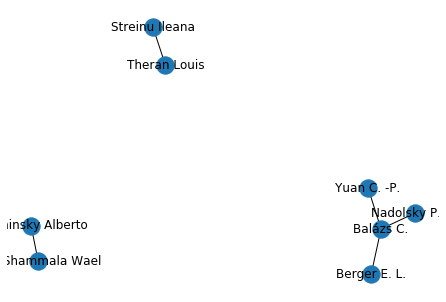

In [6]:
nx.draw(G, with_labels=True)

得到作者之间的距离：

In [7]:
try:
    print(nx.dijkstra_path(G, 'Balázs C.', 'Ziambaras Eleni'))
except:
    print('No path')

No path


如果我们500⽚论⽂构建图，则可以得到更加完整作者关系，并选择最⼤联通⼦图进⾏绘制，折线图为
⼦图节点度值。

8


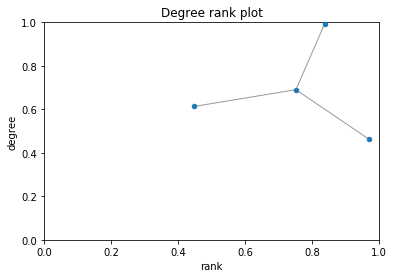

In [9]:
degree_sequence=sorted([d for n,d in G.degree()],reverse=True)
dmax=max(degree_sequence)
print(len(nx.communicability(G)))
#plt.loglog(degree_sequence, "b-", marker="o")
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")
# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc)
plt.axis("off")
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
plt.show()